*11 Feb 2021, Julian Mak (whatever with copyright, do what you want with this)

### As part of material for OCES 3301 "Data Analysis in Ocean Sciences" delivered at HKUST

For the latest version of the material, go to the public facing [GitHub](https://github.com/julianmak/academic-notes/tree/master/OCES3301_data_analysis_ocean) page.

# Model assignment hand-in (probably "excellent" version): for the logistic map example

The following is my take on what would be counted as an excellent / top-tier assignment, with explanations of why at the end. Skip all the way to the end if you want to read the criteria first before going through the notebook to look out for the relevant features.

> NOTE: The barely satisfactory attempt in another file is basically the present notebook, but where I deliberately get rid of some lines of code and screw up the text.
>
> NOTE: The way I structured the presentation is just my way of doing it. You don't have to follow it, choose one that works for you (I personally place quite a large emphasis on being systematic, with a clear logical ordering).

# The logistic map

-----------------

# $\S$1 Introduction and background

The [logistic map](https://en.wikipedia.org/wiki/Logistic_map) is given mathematically by

\begin{equation*}
    x_{n+1} = r x_n (1 - x_n) = r x_n - r x_n^2,
\end{equation*}

where

* $x_n$ represents the population percentage at generation $n$, with $x_n$ ranging from $0$ to $1$, where $0$ is extinction and $1$ is the maximum capacity,
* $r \geq 0$ is some parameter that can be specified.

Given some initial condition $x_0 \in [0, 1]$, the model can be iterated accordingly to give the evolution of the population in future generations. The key part of the model is that there is a *linear* "growth" term (it is only a growth if $r > 1$), represented by $r x_n$, and a *nonlinear* decay, represented by $-r x_n^2$. Depending on the choice of $r$, the model exhibits different types of behaviour, which will be demonstrated below. Mathematically, it is one of the simplest examples of a [**difference equation**](https://en.wikipedia.org/wiki/Recurrence_relation) that also displays [**chaotic behaviour**](https://en.wikipedia.org/wiki/Chaos_theory); cf. the [*Lorenz equation*](https://en.wikipedia.org/wiki/Lorenz_system) and the famous butterfly diagram (after Lorenz, 1963, but also see Saltzman, 1962).

For concreteness of the exposition here, we will consider the above as a mathematical representation of the spread of **cursedness** in a population of animals. Spread of cursedness in animals would be dependent on the population (hence the $x_n$ dependence in the growth term) and some sort of rate of infection/"blessing" (in this case measured by $r$), and the spread of cursedness is modelled here by the linear term $r x_n$. Being cursed means the animal gets recognised, and it is taken to be exorcised and "cured", in this case the removal of cursedness from a population is represented by the quadratic term $-r x_n^2$ (who knows, maybe the exorcists are very efficient, or that it is quite easy to removed cursedness from animals). Below demonstrates an example of spread of cursedness, through the photoshop medium, which may be expected to have a low-ish value of $r$, because it takes time to do the photoshop, and it definitely takes a lot of time undoing the photoshop (I am just making this up, don't take this too seriously...)

<img src="https://i.imgur.com/v2v8SPi.png" width="600" alt='spread of cursedness'>
<center>Original black cat crossing the road, and photoshopped angry/cursed version.</center>



For completeness, the below code loads the default packages, and is an implementation of the logistic map as a subroutine, provided in *01_python_things.ipynb*. Briefly, the subroutine takes in the initial condition $x_0$ and the value of $r$ as an input, and by default carries out 100 iterations. The iteration procedure is done through a `for` loop, returning an array as an output (the array was initialised to be zeros, and at each iteration the value is dumped into the array according to the index).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define some defaults plotting formats
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["image.cmap"] = "RdBu_r"
plt.rcParams["axes.formatter.limits"] = [-4, 4]
plt.rcParams["font.size"] = 12.0

def logistic_map(x0, r, generation=100):
    """
    subroutine to iterate on the logistic map
    
    x(n+1) = r * x(n) * (1.0 - x(n)) = r * x(n) - r * x(n)**2,
    
    which is a simple model for population growth (r * x(n)) and death (- r * x(n)**2)
      
    returns an array, need to specify 
        initial condition x0 (between 0 and 1, interpreted as a population percentage)
        ratio r (any positive number really)
    
    optional argument
        number of generations (default is 100)
    """
    
    x_out = np.zeros(generation+1)
    x_out[0] = x0
    for i in range(generation):
        x_out[i+1] = r * x_out[i] * (1.0 - x_out[i])

    return x_out

--------------------
# $\S$2 Results

The principal parameter I am going to investigate in this case is $r$, and I am also just going to be using the default of 25 generations and initial condition of $x_0 = 0.5$ unless otherwise stated.

> NOTE: Most of these results are actually already documented on the [Wikipedia page](https://en.wikipedia.org/wiki/Logistic_map), so I am merely reproducing selections of the results there, so nothing is really "new" here.

## a) $0< r \leq 1$: extinction

We are going to ignore the $r=0$ case because the solution is just zero regardless of initial condition. For $r leq 1$, notice that the linear "growth" term is really more like a decay term (because multiplying by a number smaller than 1 reduces the number, while multiplying by 1 does nothing), while the quadratic decay term leads to decay, so the population eventually dies out regardless of (valid) initial conditions. The graph below represents this extinction behaviour for a variety of initial conditions $x_0$ and $r \in (0, 1]$.

> NOTE: Coding-wise, I didn't want to make this too long, so I ended up looping the code in a `for` loop over the initial condition

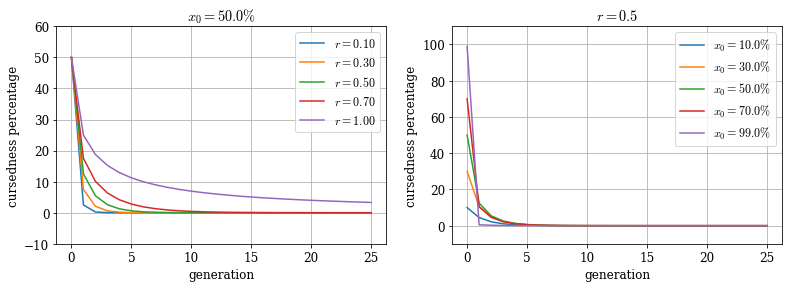

In [2]:
# cycles over different initial conditions and r values

generation = 25

# pre-define figure
fig = plt.figure(figsize=(13, 4))

# a) loop over r for fixed x0 = 0.5

x0 = 0.5

ax = plt.subplot(1, 2, 1) 
r_vec = [0.1, 0.3, 0.5, 0.7, 1.0]
lines = []
for r in r_vec:
    lines += ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$r = {r:.2f}$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 60])
ax.set_title(f"$x_0 = {x0*100}\%$")
ax.legend()
ax.grid()

# b) loop over x0 for fixed r = 0.5

r = 0.5

ax = plt.subplot(1, 2, 2)
x0_vec = [0.1, 0.3, 0.5, 0.7, 0.99]
lines = []
for x0 in x0_vec:
    lines += ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$x_0 = {x0*100:.1f}\%$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 110])
ax.set_title(f"$r = {r}$")
ax.legend()
ax.grid()

From the graph on the left where we vary $r$ and fix $x_0$, the decay rate appears to depend on the value of $r$, and becomes smaller as $r \nearrow 1$. It can be shown (by doing more iterations and extending the axis) that the population tends to zero.

From the graph on the right where we vary $x_0$ but keep $r=0.5$, the extinction is very rapid. Notice here that the case with the largest initial population $x_0 = 0.99$ dies off the fastest. This would be because here we have exponential decay behaviour, i.e. rate of decay is dependent on the constant $r$ as well as the population size at that time, so the bigger the population, the larger the decay rate.

> NOTE: One could for example write a code to calculate the **decay rate** (e.g. the first $n$ where the population is a factor of $\mathrm{e}$ below the initial choice of $x_0$, through $x_0 \mathrm{e}^{-\lambda n}$ say). I am not going to bother doing this, but if you did, that would definitely count towards the *originality* part.

## b) $1 < r < 2$: saturation

Once $r > 1$ we might expect non-extinction behaviour to occur, since there should be some balance between the growth and decay term. The code below carries out a similar experiment as above, but for the $1 < r < 2$ regime.

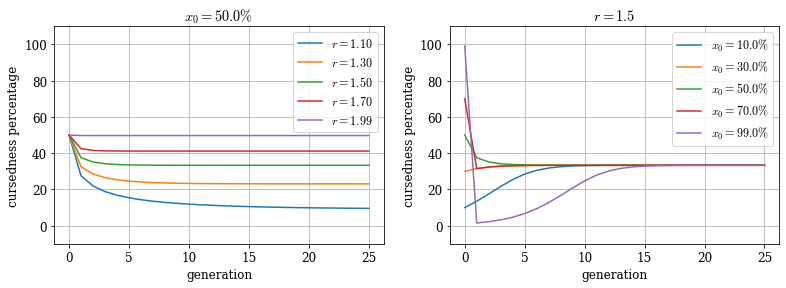

In [3]:
# cycles over different initial conditions and r values

generation = 25

# pre-define figure
fig = plt.figure(figsize=(13, 4))

# a) loop over r for fixed x0 = 0.5

x0 = 0.5

ax = plt.subplot(1, 2, 1) 
r_vec = [1.1, 1.3, 1.5, 1.7, 1.99]
lines = []
for r in r_vec:
    lines += ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$r = {r:.2f}$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 110])
ax.set_title(f"$x_0 = {100*x0}\%$")
ax.legend()
ax.grid()

# b) loop over x0 for fixed r = 1.5

r = 1.5

ax = plt.subplot(1, 2, 2)
x0_vec = [0.1, 0.3, 0.5, 0.7, 0.99]
lines = []
for x0 in x0_vec:
    lines += ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$x_0 = {x0*100:.1f}\%$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 110])
ax.set_title(f"$r = {r}$")
ax.legend()
ax.grid()

From these two graphs we see some sort of asymptotic behaviour, where the population stabilises to some value $\hat{x}$, that seems to depend on $r$ but not on $x_0$: from the right hand graph, we see that for fixed $r$ the tendency is towards the *same* asymptote $\hat{x}$.

We could see this asymptote dependence properly if we do a scan over the parameter space. The code below basically runs the logistic map over a large parameter space in ($r, x_0$), pick out the value at generation 100 and treats that as the $\hat{x}$, which we dump into an array and do a 2d plot. The assumption here is of course that the asymptote value has been essentially reached by generation 100, which empirically we can see from the graphs above, where by generation 25 the evolution seems to have stabilised. This is of course only empirical, and could be done better (e.g. pick out the value where the differences between two generations is sufficiently small, such as $|x_{n+1} - x_n| < \epsilon$ for some suitably small $\epsilon$), but the code below is easier to write.

Text(0.5, 1.0, '$\\hat{x}$ ($\\%$)')

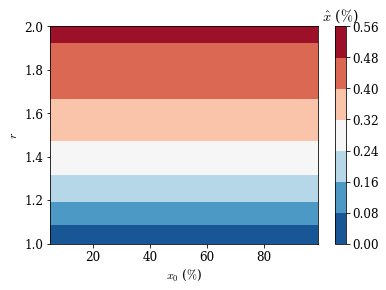

In [4]:
# scan over (r, x0) space

# set up the parameter values to scan over
# use a different length of array so 2d plot will break if orientation is wrong
r_vec = np.linspace(1, 2, 31)
x0_vec = np.linspace(0.05, 0.99, 21)

xhat = np.zeros((len(r_vec), len(x0_vec)))
for i in range(len(r_vec)):
    for j in range(len(x0_vec)):
        r = r_vec[i]
        x0 = x0_vec[j]
        dummy_array = logistic_map(x0, r)
        xhat[i, j] = dummy_array[-1]
        
# pre-define figure, do contourf plot
fig = plt.figure(figsize=(6, 4))
ax = plt.axes()
cs = ax.contourf(x0_vec * 100, r_vec, xhat)  # define contour levels output
ax.set_xlabel(r"$x_0$ ($\%$)")
ax.set_ylabel(r"$r$")
cax = plt.colorbar(cs)   # plot according to contour levels
cax.ax.set_title("$\hat{x}$ ($\%$)")

From the contour graph here, what we see is that $\hat{x}$ seems to be independent of $x_0$, and only varies with the value of $r$, as speculated above.

> NOTE: It turns out in this case there is actually an analytical solution for the asymptote $\hat{x}$ case for $1 \leq r < 2$, which turns out to be $(r-1)/r$, independent of $x_0$. If you plot the theoretical solution it basically looks exactly like the graph above.

# c) $2 \leq r < 3$: saturation, but with oscillation

As above, but now for $2 \leq r < 3$.

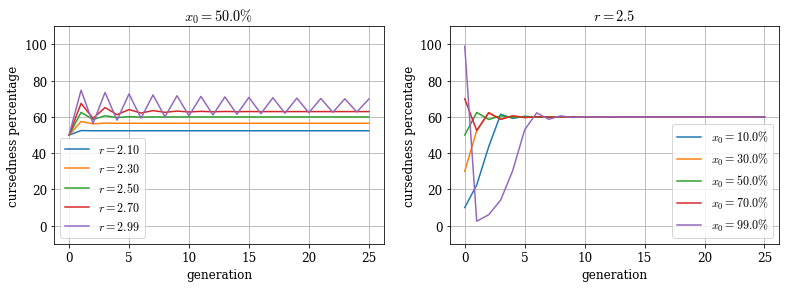

In [5]:
# cycles over different initial conditions and r values

generation = 25

# pre-define figure
fig = plt.figure(figsize=(13, 4))

# a) loop over r for fixed x0 = 0.5

x0 = 0.5

ax = plt.subplot(1, 2, 1) 
r_vec = [2.1, 2.3, 2.5, 2.7, 2.99]
lines = []
for r in r_vec:
    lines += ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$r = {r:.2f}$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 110])
ax.set_title(f"$x_0 = {100*x0}\%$")
ax.legend()
ax.grid()

# b) loop over x0 for fixed r = 2.5

r = 2.5

ax = plt.subplot(1, 2, 2)
x0_vec = [0.1, 0.3, 0.5, 0.7, 0.99]
lines = []
for x0 in x0_vec:
    lines += ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$x_0 = {x0*100:.1f}\%$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 110])
ax.set_title(f"$r = {r}$")
ax.legend()
ax.grid()

For the lower values of $r$ considered it seems like there is still the behaviour that the cursedness will still asymptote to something (and it does in fact asymptote to the same theoretical value given above), but with oscillations first. The damping of the oscillations seem to have a weak dependence on $x_0$, and significant dependence on $r$, with a very slow damping rate as $r\nearrow 3$. For completeness, the code below plots the $r=2.99$ example with increased number of generations for varying $x_0$ just to show it does asymptote eventually, with asymptote seemingly independent of $x_0$.

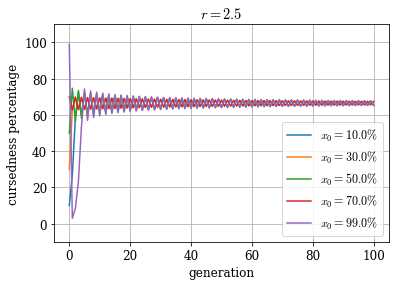

In [6]:
# a longer case for r=2.99

fig = plt.figure(figsize=(6, 4))
ax = plt.axes()
x0_vec = [0.1, 0.3, 0.5, 0.7, 0.99]
lines = []
for x0 in x0_vec:
    lines += ax.plot(100 * logistic_map(x0, 2.99, generation=100), label=f"$x_0 = {x0*100:.1f}\%$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 110])
ax.set_title(f"$r = {r}$")
ax.legend()
ax.grid()

# d) Somewhat regular oscillatory cases for $r \geq 3$

Now it starts getting interesting. For $r$ not too much larger than 3, we can have a variety of cases that are oscillatory. We are going to focus on three fixed initial conditions $x_0 = (0.2, 0.5, 0.8)$, and vary some $r$ values. The case below shows a single period oscillation.

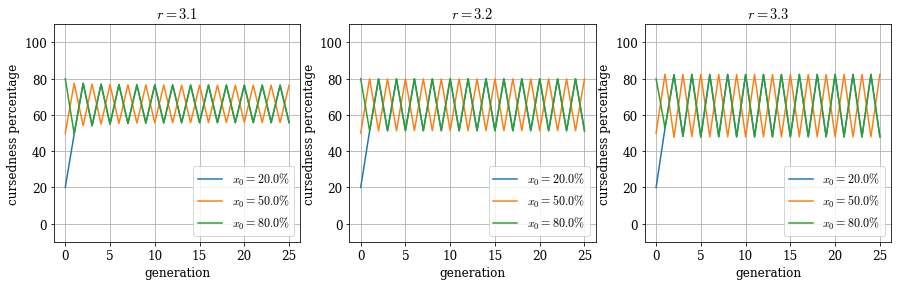

In [7]:
x0 = 0.5

fig = plt.figure(figsize=(15, 4))

ax = plt.subplot(1, 3, 1)
r = 3.1
x0_vec = [0.2, 0.5, 0.8]
lines = []
for x0 in x0_vec:
    lines += ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$x_0 = {x0*100:.1f}\%$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 110])
ax.set_title(f"$r = {r}$")
ax.legend()
ax.grid()

ax = plt.subplot(1, 3, 2)
r = 3.2
x0_vec = [0.2, 0.5, 0.8]
lines = []
for x0 in x0_vec:
    lines += ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$x_0 = {x0*100:.1f}\%$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 110])
ax.set_title(f"$r = {r}$")
ax.legend()
ax.grid()

ax = plt.subplot(1, 3, 3)
r = 3.3
x0_vec = [0.2, 0.5, 0.8]
lines = []
for x0 in x0_vec:
    lines += ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$x_0 = {x0*100:.1f}\%$")
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([-10, 110])
ax.set_title(f"$r = {r}$")
ax.legend()
ax.grid()

One thing that can be seen is that, after an initial adjustment period, instead of tending to an asymptote, the evolution starts oscillating between two values, with increasing amplitude, but the period is the same (so if you overlaid the graphs they almost lie on top of each other, with minor differences in the magnitudes of the peaks and troughs).

As you crank up $r$ even further, you start getting multiple periods in oscillations. Instead of oscillating between two values, you can start to get four, eight, etc. Below are some demonstrations of this kind of behaviour, but only for one value of $x_0$ and for more generations. The code below runs the calculations up to generation 100, but only shows the last 50, to really highlight the equilibrium behaviour. To see this **period-doubling** behaviour, we count the number of peaks until we get back to the original pattern.

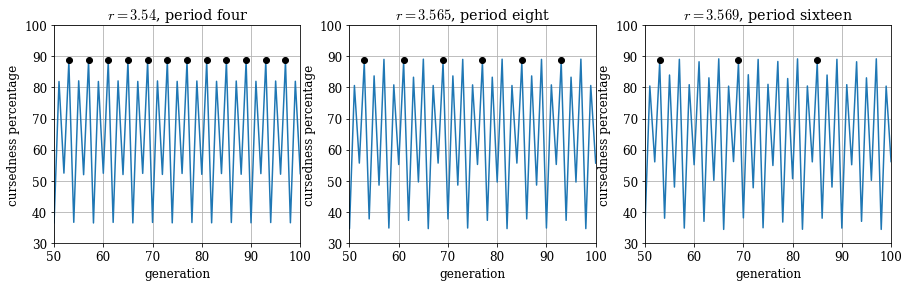

In [8]:
x0 = 0.5
generation = 100

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1, 3, 1)
r = 3.54
ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$x_0 = {x0*100:.1f}\%$")
period_seq = np.arange(53, 101, 4)  # these are chosen by hand...
ax.plot(period_seq, np.ones(len(period_seq)) * 89, 'ko') # artifical markers
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_xlim([50, 100])
ax.set_ylim([30, 100])
ax.set_title(f"$r = {r}$, period four")
ax.grid()

ax = plt.subplot(1, 3, 2)
r = 3.565
ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$x_0 = {x0*100:.1f}\%$")
period_seq = np.arange(53, 101, 8)  # these are chosen by hand...
ax.plot(period_seq, np.ones(len(period_seq)) * 89, 'ko') # artifical markers
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_xlim([50, 100])
ax.set_ylim([30, 100])
ax.set_title(f"$r = {r}$, period eight")
ax.grid()

ax = plt.subplot(1, 3, 3)
r = 3.569
ax.plot(100 * logistic_map(x0, r, generation=generation), label=f"$x_0 = {x0*100:.1f}\%$")
period_seq = np.arange(53, 101, 16)  # these are chosen by hand...
ax.plot(period_seq, np.ones(len(period_seq)) * 89, 'ko') # artifical markers
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_xlim([50, 100])
ax.set_ylim([30, 100])
ax.set_title(f"$r = {r}$, period sixteen")
ax.grid()

Before we move on, in anticipation of the next subsection, we show a few graphs where we fix $r$, but perturb the initial condition a little, and show both solutions from both calculations. We show both the raw population, as well as the (log of the absolute) differences between the two. Notice that the solutions never diverge very far from each other over the whole duration of the calculation (i.e. the orange always covers the blue, and the differences between the solution remains small).

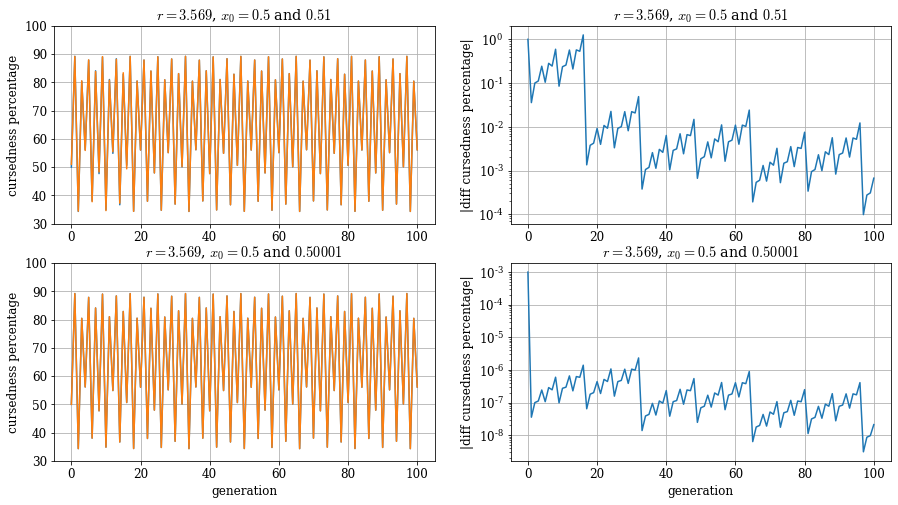

In [9]:
x0 = 0.5
generation = 100

fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(2, 2, 1)
r = 3.569
eps = 0.01
output = 100 * logistic_map(x0, r, generation=generation)
output_kick = 100 * logistic_map(x0 + eps, r, generation=generation)
ax.plot(output)
ax.plot(output_kick)
# ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([30, 100])
ax.set_title(f"$r = {r}$, $x_0 = {x0}$ and ${x0 + eps}$")
ax.grid()

ax = plt.subplot(2, 2, 2)
ax.semilogy(np.abs(output - output_kick))
# ax.set_xlabel(r"generation")
ax.set_ylabel(r"|diff cursedness percentage|")
ax.set_title(f"$r = {r}$, $x_0 = {x0}$ and ${x0 + eps}$")
ax.grid()

ax = plt.subplot(2, 2, 3)
eps = 0.00001
output = 100 * logistic_map(x0, r, generation=generation)
output_kick = 100 * logistic_map(x0 + eps, r, generation=generation)
ax.plot(output)
ax.plot(output_kick)
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([30, 100])
ax.set_title(f"$r = {r}$, $x_0 = {x0}$ and ${x0 + eps}$")
ax.grid()

ax = plt.subplot(2, 2, 4)
ax.semilogy(np.abs(output - output_kick))
ax.set_xlabel(r"generation")
ax.set_ylabel(r"|diff cursedness percentage|")
ax.set_title(f"$r = {r}$, $x_0 = {x0}$ and ${x0 + eps}$")
ax.grid()

# e) Chaos?

For larger values of $r$ we start having signatures of **chaos** appearing. One thing that is a bit harder to see (but it is there) is the seemingly lack of definite periodicity, such as in the graph below. This is slightly difficult to see in the raw graphs of the population itself, but a hint of this might be seen by eye by counting the number of generations between where the maximum and minimums occur. You can maybe convince yourself that it seems to fluctuate all over the place, unlike the cases previously where there seems to be a regular pattern.

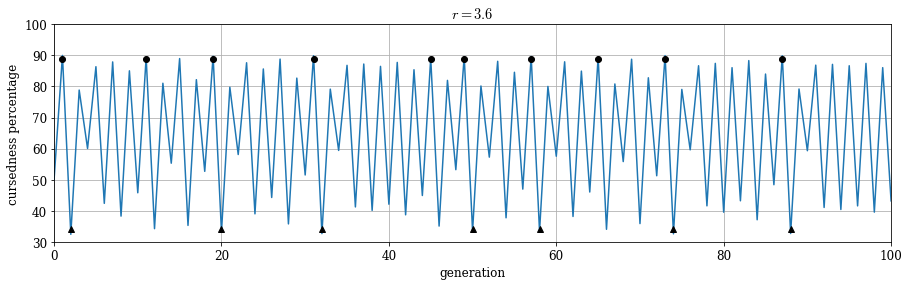

In [10]:
x0 = 0.5
generation = 100

fig = plt.figure(figsize=(15, 4))
ax = plt.axes()
r = 3.6

output = 100 * logistic_map(x0, r, generation=generation)
max_ind = np.where(output > 89)[0]  # pull out the indices of places larger than some threshold (89 here by eye)
min_ind = np.where(output < 34)[0]  # analogous to above
ax.plot(output, label=f"$x_0 = {x0*100:.1f}\%$")
ax.plot(max_ind, 89 * np.ones(len(max_ind)), 'ko')  # plot these artificial max-mins on
ax.plot(min_ind, 34 * np.ones(len(min_ind)), 'k^')
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_xlim([0, 100])
ax.set_ylim([30, 100])
ax.set_title(f"$r = {r}$")
ax.grid()

Another notable characteristic is **sensitive dependence to initial conditions**. Below we plot the same comparison graphs of the raw population and (log of absolute) difference of the cases where we perturb the initial condition a little. Notice that two graphs initially do agree (the orange covers the blue, but only initially). Making the perturbation smaller delays but does not prevent the divergence of the two calculations, as seen in the steady rise of the magnitude of differences (linear growth on a log graph is of course exponential growth).

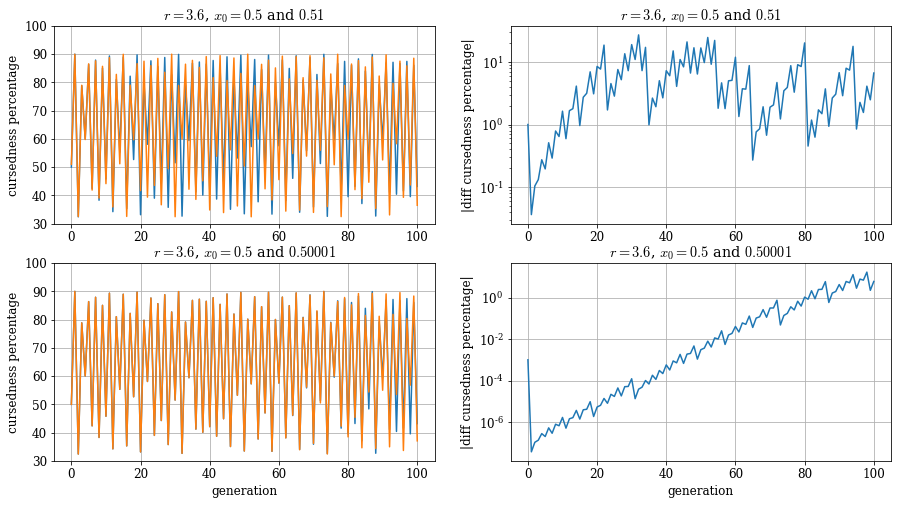

In [11]:
x0 = 0.5
generation = 100

fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(2, 2, 1)
r = 3.6
eps = 0.01
output = 100 * logistic_map(x0, r, generation=generation)
output_kick = 100 * logistic_map(x0 + eps, r, generation=generation)
ax.plot(output)
ax.plot(output_kick)
# ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([30, 100])
ax.set_title(f"$r = {r}$, $x_0 = {x0}$ and ${x0 + eps}$")
ax.grid()

ax = plt.subplot(2, 2, 2)
ax.semilogy(np.abs(output - output_kick))
# ax.set_xlabel(r"generation")
ax.set_ylabel(r"|diff cursedness percentage|")
ax.set_title(f"$r = {r}$, $x_0 = {x0}$ and ${x0 + eps}$")
ax.grid()

ax = plt.subplot(2, 2, 3)
eps = 0.00001
output = 100 * logistic_map(x0, r, generation=generation)
output_kick = 100 * logistic_map(x0 + eps, r, generation=generation)
ax.plot(output)
ax.plot(output_kick)
ax.set_xlabel(r"generation")
ax.set_ylabel(r"cursedness percentage")
ax.set_ylim([30, 100])
ax.set_title(f"$r = {r}$, $x_0 = {x0}$ and ${x0 + eps}$")
ax.grid()

ax = plt.subplot(2, 2, 4)
ax.semilogy(np.abs(output - output_kick))
ax.set_xlabel(r"generation")
ax.set_ylabel(r"|diff cursedness percentage|")
ax.set_title(f"$r = {r}$, $x_0 = {x0}$ and ${x0 + eps}$")
ax.grid()

> NOTE: I have found that for this choice of $x_0$ and $r$, a perturbation around $10^{-8}$ seems to be the limit where the numerical solution does not give a zero difference. This might be because of the choice of $r$, or the numerical precision of the machine, who knows.

--------------------
# $\S$3 Some pathological cases

Just for completeness really.

## a) Invalid $x_0$ to begin with

Below shows the raw numbers where we start off with a negative $x_0$, and one where $x_0 > 1$. These are formally invalid cases, so we don't expect the solution to be sensible. Both cases lead to negative populations.

In [12]:
# pathological case 1: invalid x0
print(f"solutionsfrom negative x0 : {100 * logistic_map(-0.5, r, generation=5)}")
print(f"solutions from x0 > 1      : {100 * logistic_map(1.5, r, generation=5)}")

solutionsfrom negative x0 : [-5.00000000e+01 -2.70000000e+02 -3.59640000e+03 -4.78574387e+05
 -8.24692683e+09 -2.44842491e+18]
solutions from x0 > 1      : [ 1.50000000e+02 -2.70000000e+02 -3.59640000e+03 -4.78574387e+05
 -8.24692683e+09 -2.44842491e+18]


## b) $r \geq 4$

It turns out this case also gives negative populations.

In [13]:
# pathological cases: r too large
print(f"solutions with r > 4 : {100 * logistic_map(0.5, 4.1, generation=5)}")

solutions with r > 4 : [   50.           102.5          -10.50625      -47.60125785
  -288.0662269  -4583.33972466]


-------------------------
# d) Conclusion

The above notebook demonstrates some of the properties of the logistic map, interpreted here as a model for spread of cursedness within a population of animals, governed by some parameter $r$, which can be interpreted as an efficiency of spread/"cure" of cursedness. The model properties largely depend on the choice of $r$, and we have:

* $0 < r \leq 1$, extinction behaviour, cursedness is completely "cured".

* $1 < r < 2$, asymptotic behaviour, some population of animals remain cursed (or blessed?).

* $2 \leq r < 3$, oscillatory behaviour that asymptotes.

* $3 \leq r < 4$, start to get oscillations between two values, period doubling, eventually to chaotic behaviour where there is no longer a well-defined period, and solutions display sensitive dependence to choice of $x_0$ for fixed $r$.

* $r \geq 4$, start getting nonsense solutions with negative populations.

Some of the boundaries empirically determined above could be quantified properly, though this is beyond the scope of the present assignment (you probably want to look into a dynamical systems course for this). The Wikipedia page on the [logistic map](https://en.wikipedia.org/wiki/Logistic_map) provides more background and further directions if you are interested.

Though we used cursedness as an attribute to model, the logistic map could also serve as a model with anything involving some sort of population (e.g. diseases, religion, whatever). The current discrete model has relatives/extensions in the discrete sense (e.g. [Ricker model](https://en.wikipedia.org/wiki/Ricker_model)), or in the continuous sense (e.g. [Fisher or FKPP equation](https://en.wikipedia.org/wiki/Fisher%27s_equation)), or to higher dimensions and/or more variables. These are beyond the scope here.

In terms of extra coding and analysis things to try, there are two things I can think of, although I have not attempted them here:

1) **Make a movie**. Fix $x_0$ probably, vary $r$, and for each value of $r$, plot the numerical solution and get Python to output an image file (so a `for` loop and some suitable naming of the image output is required). Then make the output images into a flip book, and you have a movie. `Matplotlib` itself also has animation capabilities, although I don't like using it personally. This is essentially the left hand panel of the first animation on the Wikipedia page.

2) **Do a power spectrum analysis** (cf. material in *08_time_series*). This is a bit beyond here, but if you could do something like previous point and compute the power spectrum (easiest done through a Fourier transform) for each of the logistic map calculation, which makes it much easier to see the period doubling and chaos onset behaviour as $r$ is increased beyond 3 towards 4. What you will see is that when you first start getting permanent oscillatory behaviour, you only have power at one location (which is...?), then other peaks start popping up, until when you start getting the onset of chaos and you start getting power everywhere. This would essentially be the right hand panel of the animation on the Wikipedia page.

-------------
# Bibliography

* Lorenz, E. N. (1963). Deterministic nonperiodic flow. *Journal of the Atmospheric Sciences*, **20**(2), 130-141

* Saltzman, B. (1962). Finite Amplitude Free Convection as an Initial Value Problem-I. *Journal of the Atmospheric Sciences*, **19**(4): 329-341

---------------------
# Appendix: Why I would grade this notebook to be excellent

(and it is not just because I wrote it...)

I went a bit overboard and added more things to the notebook than I intended, and the extra things I would say pushes the attempt above from good/excellent to what I would regard as top-tier hand-in I would expect from students. 

The basic points I would have expected of a **good to good/excellent** hand-in demonstrated here are:

* Properly set out section and subsection headings.
* Actual descriptive text in the introduction and conclusion.
* Appropriately formatted Jupyter comment cells.
* Fairly thorough scientific investigation and demonstration of discussed scientific/Python techniques from the course.
* Demonstration of Python/coding techniques and their utilisation to reinforce the scientific investigation.
* Scientific points are largely accurate and to the point.
* Comments cells to state the scientific points as well as links with the code.
* The code is largely correct and not too cluttered.
  - I could probably clean the above code a bit more, but that would be more in the really excellent category.
* Some commenting of code.
* Plots are appropriately labelled, formatted to illustrate scientific points (e.g. appropriate choice of axis and limits, choice of plots), big enough to read, etc.
* Bibliography and referencing.
  - Referencing inline to articles, links to pages, and mentions of course notebooks where appropriate.
  - I couldn't care less about the APA vs Harvard vs Boston vs whatever style, pick one and be consistent.
* Text is largely grammatically correct and gets the point across without ambiguity.
  - I also don't care whether you go American / British / Aussie English, again be consistent.
  - For this course I am not that bothered about being completely formal with the scientific writing, keeping it a little casual is ok.
* The whole notebook and its code does run from scratch.
* The notebook is long enough to be thorough but not so long to be long-winded.
  - This assignment would be around the length I would expect hand-ins to be.
  
The **really excellent** points I would expect of a hand-in demonstrated here are:

* A properly structured report
  - Just because you did something in a certain order does not necessarily mean you *write* it in that order. Always have a think about what kind of story you want to tell (e.g. I plotted the mismatch graph for the chaos part first, before going back and deciding to put that in also in the part with periodic signals, so as to set up the narrative and anticipation for the reader somewhat).
  - Also, just because you tried a lot of things does not mean you should necessarily put everything in. Good practice generally is do more than you need, then you can be selective about what to put in. Think about what the main and secondary foci are and give the material the appropriate air time.
  - To achieve these, **leave yourself enough time and don't do stuff last minute**! For the assignments I give, they are not going to be 1 day jobs. You probably want to just try playing around with a few things in a scrap notebook, get some feel for the results, before you write it up in another notebook say. 
  - For reference, I spent about 6 hours writing this model solution and proof reading, and I happen to know almost exactly what I am doing, although I also spent quite a bit of time writing this appendix and the other logistics related text. Probably about 20-30% of the things things I tried (e.g. plotting formats, choices of $r$ values, number of lines and range in plots) never made the final cut.
  - You could put things in an Appendix, but be sensible about it, and don't treat the Appendix as a dumping ground.
* Extras in the coding to support the scientific point.
  - The circular markers in the graphs with varying periods to guide the reader.
  - Plotting of the mismatch (on the log-scale) to demonstrate the divergence of nearby solutions.
  - Choice of printing out raw outputs instead of graphs in the pathological cases.
    * Try it yourself, if you plot a graph it is not actually as informative or obvious in a way, because the solutions blow up to minus infinity really quickly, so you just get a flat line that jumps to something really big quickly.
  - I didn't do it, but packing some of the plotting commands into a subroutine to make the code even cleaner.
* Exploration of the pathological cases.
  - Some sort of demonstration of being thorough.
  - Note I didn't give that much space for that part, because it is arguably an aside and not the principal focus (see above part about *properly structured report*).

The originality stuff would/could be:

* Use of cursed animal, memes, puns and/or snide comments.
* The use of `contourf` to demonstrate the point about dependence on $r$ and not $x_0$.
  - Because we haven't talked about `contourf` yet, although that will be in `09_fun_with_maps`.
* That bit of coding that picks out indices satisfying some condition.
  - An internet search would give you that but, again, it's something beyond the course material.
* The movie and the frequency graph in the Conclusions section would definitely count.
* Some other mathematical description (e.g. if you talk about bifurcations and/or period doubling).
* Some sort of Contents page with hyperlinks to the individual sections of the Jupyter notebook, which I didn't do.
  - Almost certain Markdown allows for this (because I have used it [here](https://nemo-related.readthedocs.io/) and seen it used in other people's notebooks, but I haven't tried it myself in Jupyter).

> NOTE: Remember, the "originality" part is only 10% of the marks, so you really should try and do the ones with more marks before attempting the ones with diminishing returns.